In [1]:
import pandas as pd
import numpy as np
import os #Interacts with the operating system, e.g. paths, mkdir
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Allows ploting in a 3D graph

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report



In [2]:
file_path = './PowerPlantsintheU_Export_TableToExcel.xlsx'
df = pd.read_excel(file_path)

In [71]:
df.head().iloc[:,10:30]

,State,Zip,PrimSource,source_des,tech_desc,Install_MW,Total_MW,Bat_MW,Bio_MW,Coal_MW,Geo_MW,Hydro_MW,HydroPS_MW,NG_MW,Nuclear_MW,Crude_MW,Solar_MW,Wind_MW,Other_MW,Source
0,Wisconsin,54452,hydroelectric,Hydroelectric = 2.3 MW,Conventional Hydroelectric,2.3,2.3,0.0,0.0,0.0,0.0,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923"
1,Wisconsin,54143,hydroelectric,Hydroelectric = 1.3 MW,Conventional Hydroelectric,1.3,1.3,0.0,0.0,0.0,0.0,1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923"
2,Wisconsin,54303,natural gas,Natural Gas = 79 MW,Natural Gas Fired Combustion Turbine,91.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923"
3,Wisconsin,54114,hydroelectric,Hydroelectric = 3.8 MW,Conventional Hydroelectric,3.8,3.8,0.0,0.0,0.0,0.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923"
4,Wisconsin,54487,hydroelectric,Hydroelectric = 2.6 MW,Conventional Hydroelectric,2.6,2.6,0.0,0.0,0.0,0.0,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923"


In [4]:
df.nunique()

OBJECTID_1    12008
OBJECTID      12008
Plant_Code    12008
Plant_Name    11985
Utility_ID     5123
Utility_Na     5109
sector_nam        7
Street_Add    11193
City           4871
County         1441
State            52
Zip            6637
PrimSource       12
source_des     3952
tech_desc       154
Install_MW     2163
Total_MW       2044
Bat_MW          114
Bio_MW          247
Coal_MW         220
Geo_MW           58
Hydro_MW        492
HydroPS_MW       41
NG_MW          1122
Nuclear_MW       55
Crude_MW        334
Solar_MW        393
Wind_MW         593
Other_MW         79
Source            1
Period            1
Longitude     11726
Latitude      11657
dtype: int64

In [5]:
df_outlier = df[df['Install_MW']>5000].copy() # save the outlier in a df
df.drop(df_outlier.index,inplace = True) # drop the outlier from the original df

In [6]:
# Calculate the total of production of energy by State
df_powerByState = df.groupby('State')[['Install_MW','Total_MW']].sum().reset_index()
# Rename columns 
df_powerByState.rename(columns={'Install_MW':'Install_MW_State','Total_MW':'Total_MW_State'},inplace=True)
# Merge the total with the df
df = pd.merge(df,df_powerByState, on = 'State')

In [7]:
# Select columns to analyze
Scolumns = ['sector_nam','PrimSource','Install_MW','Total_MW','Install_MW_State','Total_MW_State']
df[Scolumns]

,sector_nam,PrimSource,Install_MW,Total_MW,Install_MW_State,Total_MW_State
0,Electric Utility,hydroelectric,2.3,2.3,18146.5,16742.1
1,Electric Utility,hydroelectric,1.3,1.3,18146.5,16742.1
2,Electric Utility,natural gas,91.0,79.0,18146.5,16742.1
3,Electric Utility,hydroelectric,3.8,3.8,18146.5,16742.1
4,Electric Utility,hydroelectric,2.6,2.6,18146.5,16742.1
...,...,...,...,...,...,...
12002,Commercial CHP,natural gas,6.0,6.0,6527.7,5981.0
12003,Commercial Non-CHP,petroleum,3.8,2.4,6527.7,5981.0
12004,Industrial Non-CHP,petroleum,27.6,27.6,6527.7,5981.0
12005,Industrial Non-CHP,petroleum,8.2,8.2,6527.7,5981.0


C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

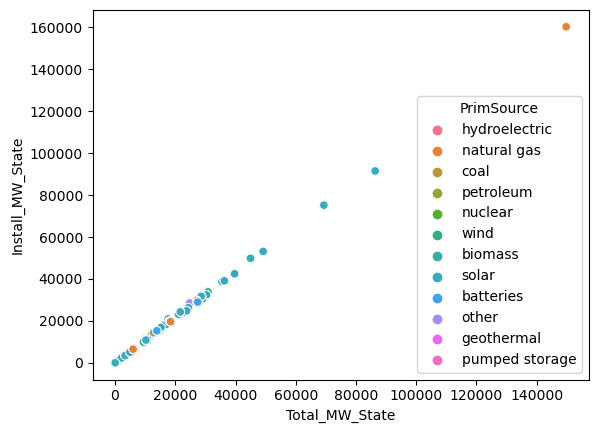

In [8]:
sns.scatterplot(data = df, x = df.Total_MW_State, y = df.Install_MW_State, hue = 'PrimSource')

plt.show()

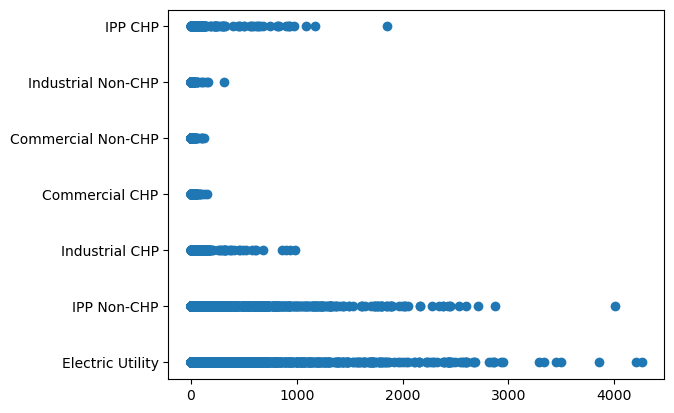

In [9]:


plt.scatter(df.Install_MW,df.sector_nam)

plt.show()

In [10]:
# sns.scatterplot(df, df.)

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

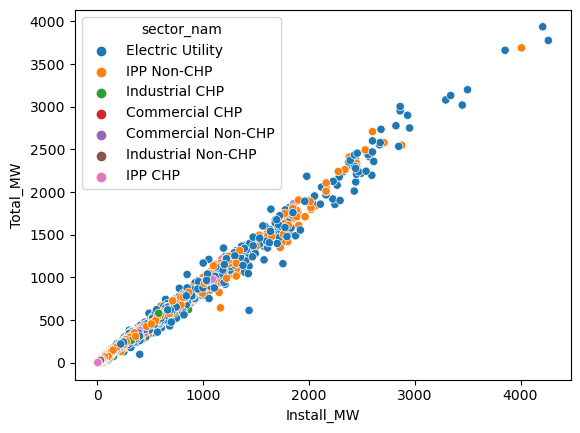

In [11]:

sns.scatterplot(data = df, x = df.Install_MW, y = df.Total_MW,hue='sector_nam')


# plt.xlabel('Birth Rate')
# plt.ylabel('Unemployment rate(%)')
# plt.title('Scatterplot of Birth Rate vs Unemployment rate(%)')


plt.show()

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

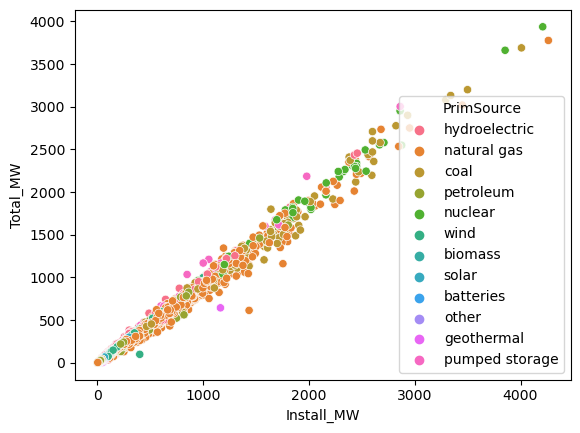

In [12]:

sns.scatterplot(data = df, x = df.Install_MW, y = df.Total_MW,hue='PrimSource')


# plt.xlabel('Birth Rate')
# plt.ylabel('Unemployment rate(%)')
# plt.title('Scatterplot of Birth Rate vs Unemployment rate(%)')


plt.show()

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='sector_nam', ylabel='Install_MW'>

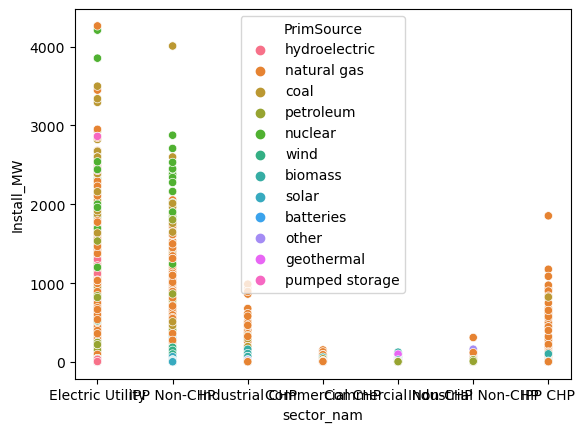

In [13]:
sns.scatterplot(data=df, x = df.sector_nam, y = df.Install_MW, hue = 'PrimSource')

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='PrimSource', ylabel='Total_MW'>

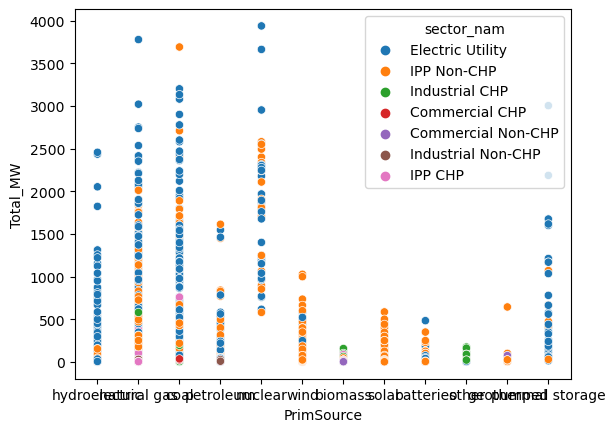

In [14]:
sns.scatterplot(data = df, x = df.PrimSource, y = df.Total_MW, hue = df.sector_nam)

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

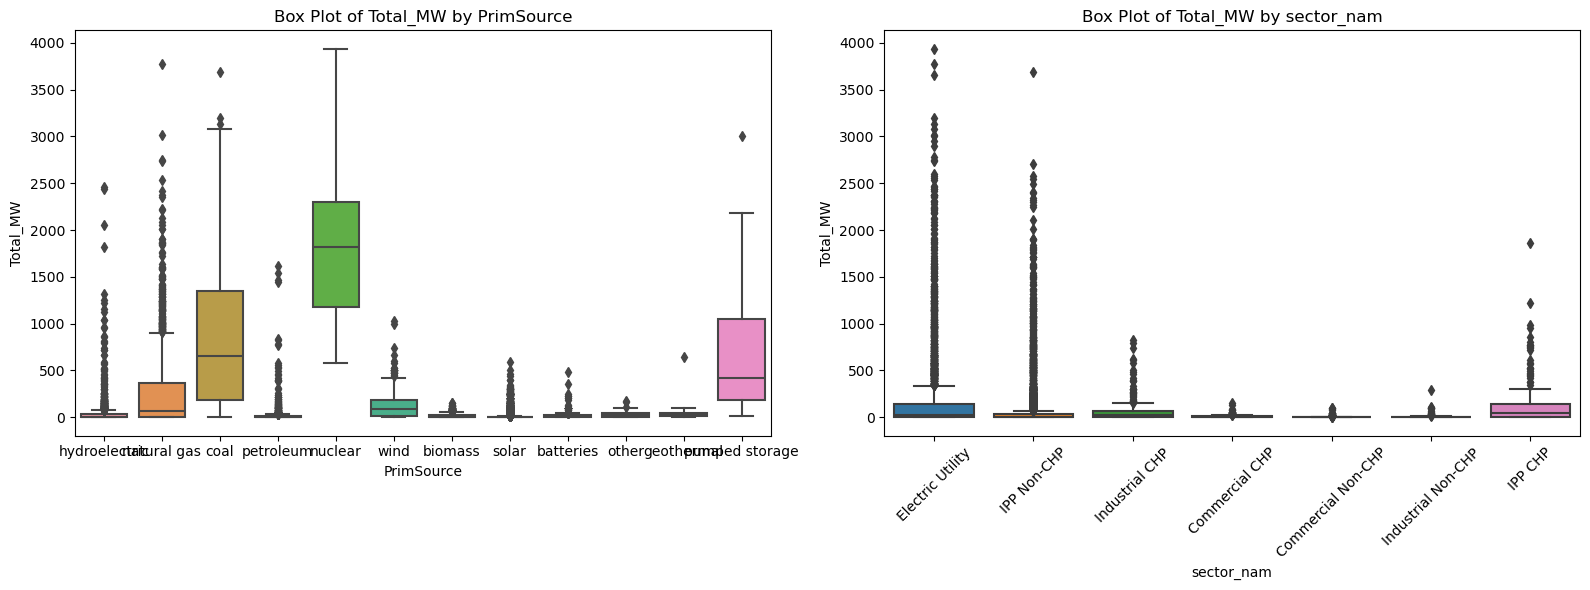

In [166]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot without 'sector_nam' as hue
sns.boxplot(data=df, x='PrimSource', y='Total_MW', ax=axes[0])
axes[0].set_title('Box Plot of Total_MW by PrimSource')
axes[0].set_xlabel('PrimSource')
axes[0].set_ylabel('Total_MW')

# Box plot with 'sector_nam' as x-axis
sns.boxplot(data=df, x='sector_nam', y='Total_MW', ax=axes[1])
axes[1].set_title('Box Plot of Total_MW by sector_nam')
axes[1].set_xlabel('sector_nam')
axes[1].set_ylabel('Total_MW')

# Rotate x-axis labels in the right subplot
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [200]:
df_KMeans = df[Scolumns].copy()

label_encoder = LabelEncoder()

df_KMeans['Sector_encoded'] = label_encoder.fit_transform(df_KMeans.sector_nam)
df_KMeans['PimSource_encoded'] = label_encoder.fit_transform(df_KMeans.PrimSource)

df_KMeans#.nunique()



,sector_nam,PrimSource,Install_MW,Total_MW,Install_MW_State,Total_MW_State,Sector_encoded,PimSource_encoded
0,Electric Utility,hydroelectric,2.3,2.3,18146.5,16742.1,2,4
1,Electric Utility,hydroelectric,1.3,1.3,18146.5,16742.1,2,4
2,Electric Utility,natural gas,91.0,79.0,18146.5,16742.1,2,5
3,Electric Utility,hydroelectric,3.8,3.8,18146.5,16742.1,2,4
4,Electric Utility,hydroelectric,2.6,2.6,18146.5,16742.1,2,4
...,...,...,...,...,...,...,...,...
12002,Commercial CHP,natural gas,6.0,6.0,6527.7,5981.0,0,5
12003,Commercial Non-CHP,petroleum,3.8,2.4,6527.7,5981.0,1,8
12004,Industrial Non-CHP,petroleum,27.6,27.6,6527.7,5981.0,6,8
12005,Industrial Non-CHP,petroleum,8.2,8.2,6527.7,5981.0,6,8


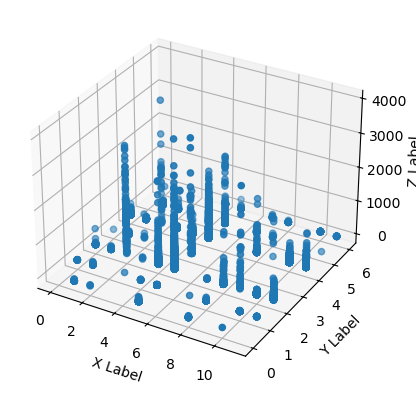

In [187]:
# Create a new figure with 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data in 3D
ax.scatter(df_KMeans.PimSource_encoded, df_KMeans.Sector_encoded, df.Total_MW)

# Set labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [203]:

df_KMeans[['SInstall_MW','STotal_MW','STotal_MW_State','SSector_encoded','SPimSource_encoded']] = StandardScaler().fit_transform(df_KMeans[['Install_MW','Total_MW','Total_MW_State','Sector_encoded','PimSource_encoded']])
df_KMeans

,sector_nam,PrimSource,Install_MW,Total_MW,Install_MW_State,Total_MW_State,Sector_encoded,PimSource_encoded,SInstall_MW,STotal_MW,SSector_encoded,SPimSource_encoded,STotal_MW_State
0,Electric Utility,hydroelectric,2.3,2.3,18146.5,16742.1,2,4,-0.335517,-0.334749,-1.131274,-1.100972,-0.642068
1,Electric Utility,hydroelectric,1.3,1.3,18146.5,16742.1,2,4,-0.338784,-0.338280,-1.131274,-1.100972,-0.642068
2,Electric Utility,natural gas,91.0,79.0,18146.5,16742.1,2,5,-0.045761,-0.063923,-1.131274,-0.791000,-0.642068
3,Electric Utility,hydroelectric,3.8,3.8,18146.5,16742.1,2,4,-0.330617,-0.329453,-1.131274,-1.100972,-0.642068
4,Electric Utility,hydroelectric,2.6,2.6,18146.5,16742.1,2,4,-0.334537,-0.333690,-1.131274,-1.100972,-0.642068
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,Commercial CHP,natural gas,6.0,6.0,6527.7,5981.0,0,5,-0.323430,-0.321684,-2.840067,-0.791000,-0.927038
12003,Commercial Non-CHP,petroleum,3.8,2.4,6527.7,5981.0,1,8,-0.330617,-0.334396,-1.985670,0.138916,-0.927038
12004,Industrial Non-CHP,petroleum,27.6,27.6,6527.7,5981.0,6,8,-0.252870,-0.245415,2.286314,0.138916,-0.927038
12005,Industrial Non-CHP,petroleum,8.2,8.2,6527.7,5981.0,6,8,-0.316243,-0.313916,2.286314,0.138916,-0.927038


In [204]:
df_KMeans.iloc[:,8:]
# km.fit_predict(df_KMeans.iloc[:,2:].values)


,SInstall_MW,STotal_MW,SSector_encoded,SPimSource_encoded,STotal_MW_State
0,-0.335517,-0.334749,-1.131274,-1.100972,-0.642068
1,-0.338784,-0.338280,-1.131274,-1.100972,-0.642068
2,-0.045761,-0.063923,-1.131274,-0.791000,-0.642068
3,-0.330617,-0.329453,-1.131274,-1.100972,-0.642068
4,-0.334537,-0.333690,-1.131274,-1.100972,-0.642068
...,...,...,...,...,...
12002,-0.323430,-0.321684,-2.840067,-0.791000,-0.927038
12003,-0.330617,-0.334396,-1.985670,0.138916,-0.927038
12004,-0.252870,-0.245415,2.286314,0.138916,-0.927038
12005,-0.316243,-0.313916,2.286314,0.138916,-0.927038


In [205]:
km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(df_KMeans.iloc[:,8:])
df_KMeans['Cluster'] = y_predicted

C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [193]:
df_KMeans

,sector_nam,PrimSource,Install_MW,Total_MW,Install_MW_State,Total_MW_State,Sector_encoded,PimSource_encoded,SInstall_MW,STotal_MW,SSector_encoded,SPimSource_encoded,Cluster
0,Electric Utility,hydroelectric,2.3,2.3,18146.5,16742.1,2,4,-0.335517,-0.334749,-1.131274,-1.100972,2
1,Electric Utility,hydroelectric,1.3,1.3,18146.5,16742.1,2,4,-0.338784,-0.338280,-1.131274,-1.100972,2
2,Electric Utility,natural gas,91.0,79.0,18146.5,16742.1,2,5,-0.045761,-0.063923,-1.131274,-0.791000,2
3,Electric Utility,hydroelectric,3.8,3.8,18146.5,16742.1,2,4,-0.330617,-0.329453,-1.131274,-1.100972,2
4,Electric Utility,hydroelectric,2.6,2.6,18146.5,16742.1,2,4,-0.334537,-0.333690,-1.131274,-1.100972,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,Commercial CHP,natural gas,6.0,6.0,6527.7,5981.0,0,5,-0.323430,-0.321684,-2.840067,-0.791000,2
12003,Commercial Non-CHP,petroleum,3.8,2.4,6527.7,5981.0,1,8,-0.330617,-0.334396,-1.985670,0.138916,2
12004,Industrial Non-CHP,petroleum,27.6,27.6,6527.7,5981.0,6,8,-0.252870,-0.245415,2.286314,0.138916,1
12005,Industrial Non-CHP,petroleum,8.2,8.2,6527.7,5981.0,6,8,-0.316243,-0.313916,2.286314,0.138916,1


C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Total_MW', ylabel='Install_MW'>

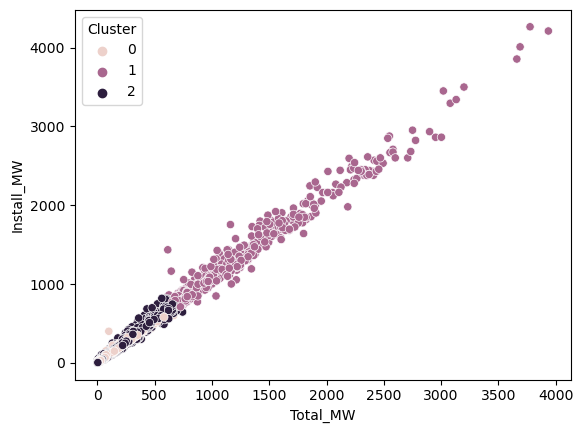

In [206]:

sns.scatterplot(data = df_KMeans, x=df_KMeans.Total_MW, y=df_KMeans.Install_MW, hue = 'Cluster')

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='Total_MW', ylabel='Install_MW'>

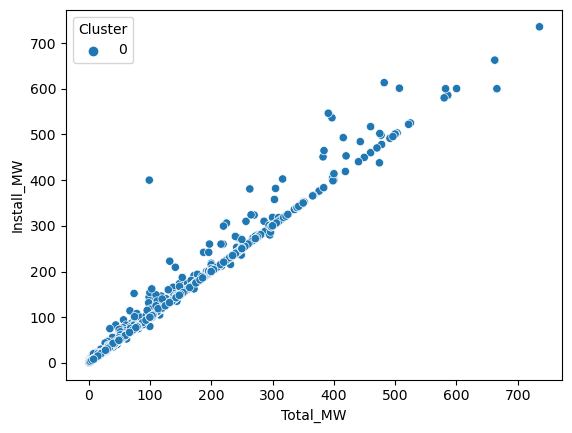

In [207]:
df1 = df_KMeans[df_KMeans['Cluster']==0]
sns.scatterplot(data = df1, x=df1.Total_MW, y=df1.Install_MW, hue = 'Cluster')

In [209]:
df_KMeans.iloc[:,8:13]

,SInstall_MW,STotal_MW,SSector_encoded,SPimSource_encoded,STotal_MW_State
0,-0.335517,-0.334749,-1.131274,-1.100972,-0.642068
1,-0.338784,-0.338280,-1.131274,-1.100972,-0.642068
2,-0.045761,-0.063923,-1.131274,-0.791000,-0.642068
3,-0.330617,-0.329453,-1.131274,-1.100972,-0.642068
4,-0.334537,-0.333690,-1.131274,-1.100972,-0.642068
...,...,...,...,...,...
12002,-0.323430,-0.321684,-2.840067,-0.791000,-0.927038
12003,-0.330617,-0.334396,-1.985670,0.138916,-0.927038
12004,-0.252870,-0.245415,2.286314,0.138916,-0.927038
12005,-0.316243,-0.313916,2.286314,0.138916,-0.927038


In [210]:
wcss = []

for k in range(1,11):
    km = KMeans(n_clusters=k)
    km.fit(df_KMeans.iloc[:,8:13])
    wcss.append(km.inertia_)
    


C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\crist\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

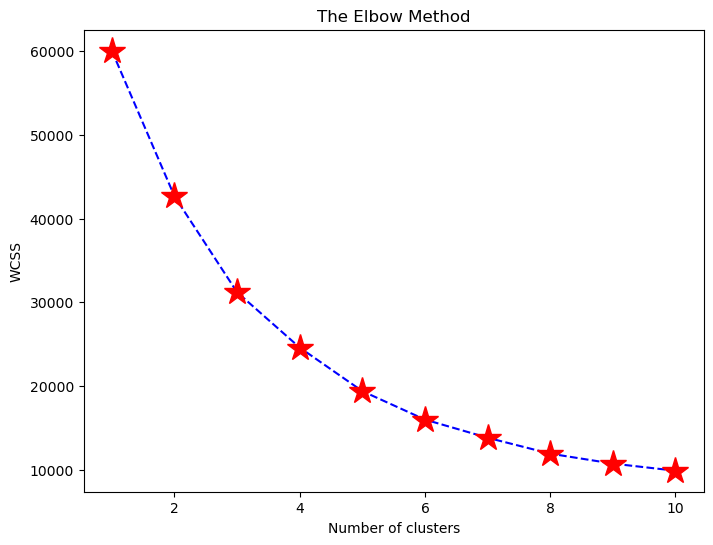

In [211]:
fx, ax = plt.subplots(figsize = (8,6))

plt.plot(range(1,11), wcss, marker = '*', linestyle = '--', color='b', markerfacecolor = 'r', mec = 'r', ms = 20)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('ElbowMethod.png')
plt.show()



In [26]:
def get_top3 (year_top):
    def top (df,column = year_top):
        return df.sort_values(by=year_top,ascending=False)[:3]
    return df.groupby('State').apply(top).reset_index(drop=True)#[['OdName','AREA','AreaName','REG','RegName','DEV','DevName',year_top]]



In [32]:
df_top3 = get_top3('Total_MW')[['State','PrimSource', 'source_des', 'tech_desc', 'Install_MW','Total_MW','Install_MW_State', 'Total_MW_State']]
df_top3

,State,PrimSource,source_des,tech_desc,Install_MW,Total_MW,Install_MW_State,Total_MW_State
0,Alabama,nuclear,Nuclear = 3661.7 MW,Nuclear,3854.0,3661.7,30585.7,29058.4
1,Alabama,coal,Coal = 2777.5 MW,Conventional Steam Coal,2822.0,2777.5,30585.7,29058.4
2,Alabama,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,30585.7,29058.4
3,Alaska,natural gas,Natural Gas = 309.3 MW,Natural Gas Fired Combined Cycle; Natural Gas ...,346.9,309.3,3076.3,2819.3
4,Alaska,natural gas,Natural Gas = 300.4 MW,Natural Gas Fired Combustion Turbine,312.4,300.4,3076.3,2819.3
...,...,...,...,...,...,...,...,...
151,Wisconsin,natural gas,Natural Gas = 1245.8 MW,Natural Gas Fired Combined Cycle,1208.8,1245.8,18146.5,16742.1
152,Wisconsin,nuclear,"Nuclear = 1196 MW, Petroleum = 15 MW",Nuclear; Petroleum Liquids;,1311.0,1211.0,18146.5,16742.1
153,Wyoming,coal,Coal = 2119 MW,Conventional Steam Coal,2441.9,2119.0,11391.4,10091.8
154,Wyoming,coal,Coal = 1700 MW,Conventional Steam Coal,1863.0,1700.0,11391.4,10091.8


In [85]:
df_StateStatistics = df.groupby('State')['Total_MW'].sum().sort_values(ascending=False)
df_StateStatistics

State
Texas                   149783.2
California               86363.7
Florida                  69339.2
Pennsylvania             49172.7
Illinois                 44985.1
New York                 39689.9
Georgia                  36294.7
North Carolina           35510.5
Oklahoma                 30865.0
Michigan                 30391.4
Ohio                     29334.8
Alabama                  29058.4
Arizona                  28637.5
Virginia                 27435.2
Indiana                  27076.9
Louisiana                24766.9
South Carolina           24386.7
Washington               23797.7
Iowa                     22777.9
Tennessee                21667.2
Missouri                 21066.1
Kansas                   18426.6
Minnesota                18404.6
Colorado                 18100.4
Kentucky                 17635.2
Oregon                   17403.4
New Jersey               16744.9
Wisconsin                16742.1
Mississippi              15267.5
West Virginia            15020.7
Arka

In [125]:
Top10States = df_StateStatistics.reset_index().iloc[:10,:1]


In [126]:
df_visTop10 = df_top3[df_top3['State'].isin(set(Top10States['State']))].sort_values(by='Total_MW_State',ascending=False)


<Axes: xlabel='State'>

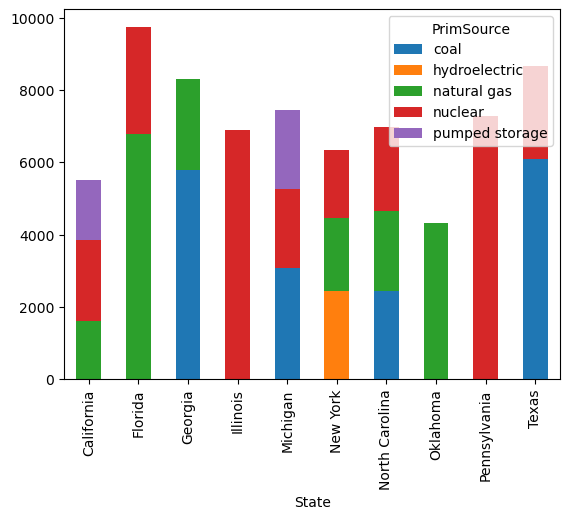

In [131]:
df_PlotTop3 = df_visTop10.groupby(['PrimSource','State'])['Total_MW'].sum().unstack().T
df_PlotTop3.fillna(0,inplace=True)
df_PlotTop3#.set_index('State',inplace = True)
# df_PlotTop3#.reset_index()

df_PlotTop3.plot(kind='bar', stacked = True)

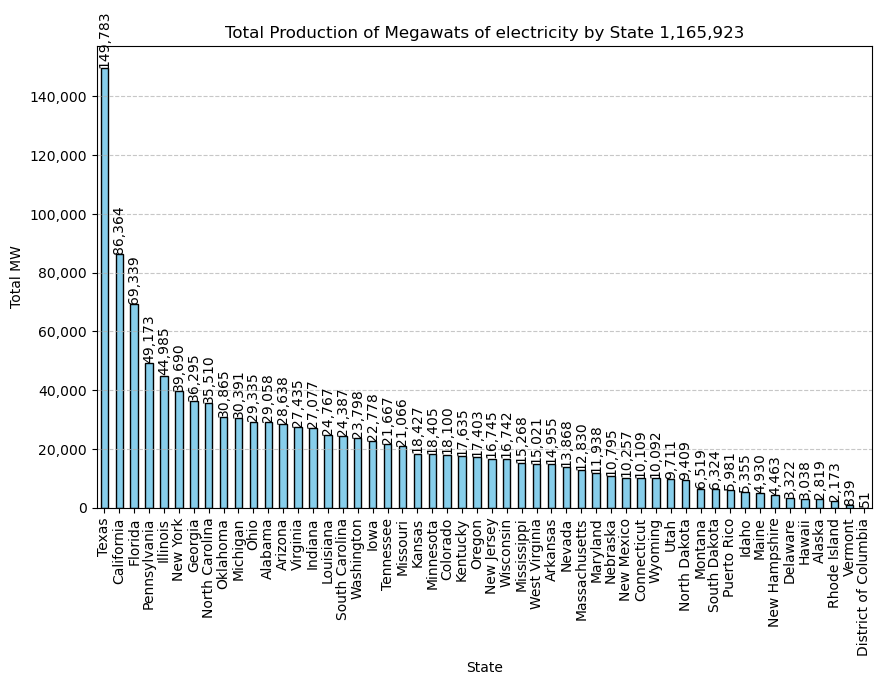

In [73]:
plt.figure(figsize=(10, 6))


# Create the bar plot
ax = df_StateStatistics.plot(kind='bar', color='skyblue', edgecolor='black')

# Format y-axis labels with comma separator
ax.yaxis.set_major_formatter('{x:,.0f}')

# Add totals to each bar
for i, value in enumerate(df_StateStatistics):
    # Increase font size and move up
    ax.text(i, value + 100, f'{value:,.0f}', ha='center', va='bottom', fontsize=10, rotation=90)

plt.title(f'Total Production of Megawats of electricity by State {format(int(df_StateStatistics.sum()),",")}')
plt.xlabel('State')
plt.ylabel('Total MW')

# Rotate x-axis labels by 0 degrees
plt.xticks(rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# plt.savefig('JBS_LabelDist.png', bbox_inches='tight')

plt.show()

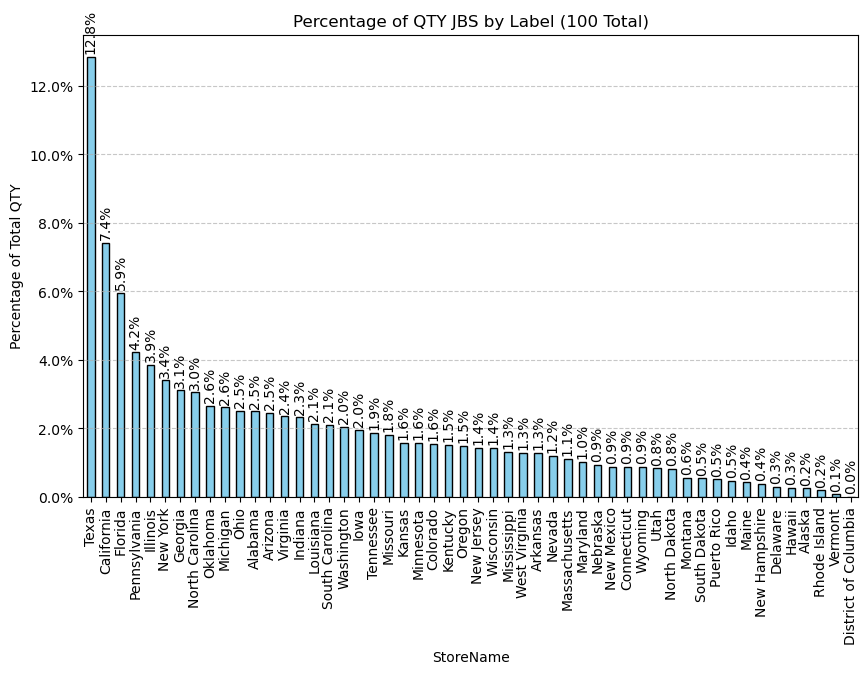

In [70]:
# Calculate percentage
df_StateStatistics = df.groupby('State')['Total_MW'].sum().sort_values(ascending=False)

df_StateStatistics_percent = df_StateStatistics / total_sum * 100
total_sum_per = df_StateStatistics_percent.sum()
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = df_StateStatistics_percent.plot(kind='bar', color='skyblue', edgecolor='black')

# Format y-axis labels to show percentage
ax.yaxis.set_major_formatter('{x:.1f}%')

# Add percentages to each bar
for i, value in enumerate(df_StateStatistics_percent):
    ax.text(i, value + 0.1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10, rotation=90)

plt.title(f'Percentage of QTY JBS by Label ({total_sum_per:,.0f} Total)')
plt.xlabel('StoreName')
plt.ylabel('Percentage of Total QTY')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

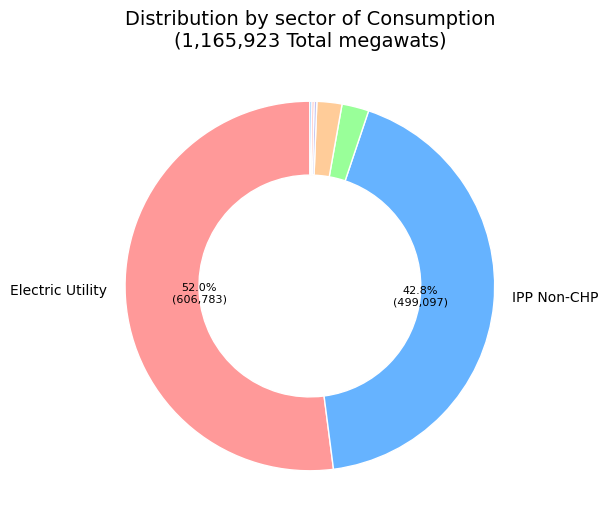

In [84]:
df_SectorNameStatistics = df.groupby('sector_nam')['Total_MW'].sum().sort_values(ascending=False)


custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create a figure with a subplot for the pie chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define a function to customize label display
def pie_label_func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    if pct >= 4.2:  # Display label only if the percentage is greater than or equal to 3%
        return f'{pct:.1f}%\n({absolute:,})'
    else:
        return ''

# Plot the pie chart with adjusted autopct label placement
wedges, texts, autotexts = ax.pie(
    df_SectorNameStatistics,
    labels=[f'{label}\n' if pct >= 3 else '' for label, pct in zip(df_SectorNameStatistics.index, df_SectorNameStatistics / df_SectorNameStatistics.sum() * 100)],
    autopct=lambda pct: pie_label_func(pct, df_SectorNameStatistics),
    startangle=90,
    colors=custom_colors,
    wedgeprops=dict(width=0.4),
    textprops=dict(color="black"),
    labeldistance=1.1,  # Adjust label distance from the center to avoid overlapping
)

# Customize the appearance of the wedges and text
for wedge, text, autotext in zip(wedges, texts, autotexts):
    wedge.set_edgecolor('white')  # White edges for better visibility
    text.set_fontsize(10)        # Adjust text font size
    autotext.set_fontsize(8)     # Adjust autopct text font size

# Add a title
plt.title(f'Distribution by sector of Consumption\n({format(int(df_SectorNameStatistics.sum()), ",")} Total megawats)', fontsize=14)

# Save the pie chart as an image
# plt.savefig('DomPieChart_DistOPTRByDIV.png', bbox_inches='tight')

# Show the plot
plt.show()


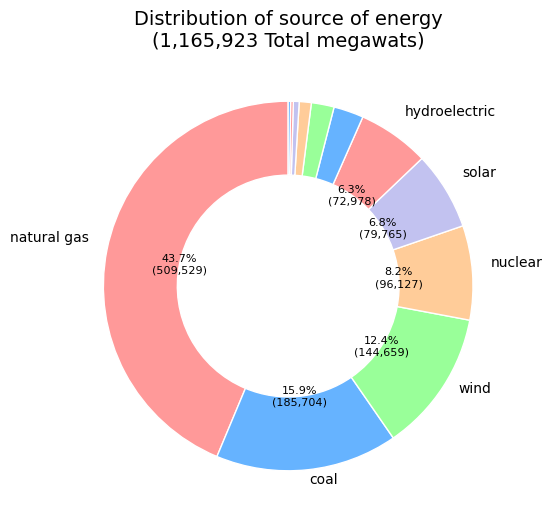

In [83]:
df_PrimSourceStatistics = df.groupby('PrimSource')['Total_MW'].sum().sort_values(ascending=False)


custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create a figure with a subplot for the pie chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define a function to customize label display
def pie_label_func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    if pct >= 4.2:  # Display label only if the percentage is greater than or equal to 3%
        return f'{pct:.1f}%\n({absolute:,})'
    else:
        return ''

# Plot the pie chart with adjusted autopct label placement
wedges, texts, autotexts = ax.pie(
    df_PrimSourceStatistics,
    labels=[f'{label}\n' if pct >= 3 else '' for label, pct in zip(df_PrimSourceStatistics.index, df_PrimSourceStatistics / df_PrimSourceStatistics.sum() * 100)],
    autopct=lambda pct: pie_label_func(pct, df_PrimSourceStatistics),
    startangle=90,
    colors=custom_colors,
    wedgeprops=dict(width=0.4),
    textprops=dict(color="black"),
    labeldistance=1.1,  # Adjust label distance from the center to avoid overlapping
)

# Customize the appearance of the wedges and text
for wedge, text, autotext in zip(wedges, texts, autotexts):
    wedge.set_edgecolor('white')  # White edges for better visibility
    text.set_fontsize(10)        # Adjust text font size
    autotext.set_fontsize(8)     # Adjust autopct text font size

# Add a title
plt.title(f'Distribution by source of energy\n({format(int(df_PrimSourceStatistics.sum()), ",")} Total megawats)', fontsize=14)

# Save the pie chart as an image
# plt.savefig('DomPieChart_DistOPTRByDIV.png', bbox_inches='tight')

# Show the plot
plt.show()


# Visualization KMeans

In [212]:
df_KMeans['State'] = df['State']
df_KMeans

,sector_nam,PrimSource,Install_MW,Total_MW,Install_MW_State,Total_MW_State,Sector_encoded,PimSource_encoded,SInstall_MW,STotal_MW,SSector_encoded,SPimSource_encoded,STotal_MW_State,Cluster,State
0,Electric Utility,hydroelectric,2.3,2.3,18146.5,16742.1,2,4,-0.335517,-0.334749,-1.131274,-1.100972,-0.642068,2,Wisconsin
1,Electric Utility,hydroelectric,1.3,1.3,18146.5,16742.1,2,4,-0.338784,-0.338280,-1.131274,-1.100972,-0.642068,2,Wisconsin
2,Electric Utility,natural gas,91.0,79.0,18146.5,16742.1,2,5,-0.045761,-0.063923,-1.131274,-0.791000,-0.642068,2,Wisconsin
3,Electric Utility,hydroelectric,3.8,3.8,18146.5,16742.1,2,4,-0.330617,-0.329453,-1.131274,-1.100972,-0.642068,2,Wisconsin
4,Electric Utility,hydroelectric,2.6,2.6,18146.5,16742.1,2,4,-0.334537,-0.333690,-1.131274,-1.100972,-0.642068,2,Wisconsin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,Commercial CHP,natural gas,6.0,6.0,6527.7,5981.0,0,5,-0.323430,-0.321684,-2.840067,-0.791000,-0.927038,2,Puerto Rico
12003,Commercial Non-CHP,petroleum,3.8,2.4,6527.7,5981.0,1,8,-0.330617,-0.334396,-1.985670,0.138916,-0.927038,2,Puerto Rico
12004,Industrial Non-CHP,petroleum,27.6,27.6,6527.7,5981.0,6,8,-0.252870,-0.245415,2.286314,0.138916,-0.927038,0,Puerto Rico
12005,Industrial Non-CHP,petroleum,8.2,8.2,6527.7,5981.0,6,8,-0.316243,-0.313916,2.286314,0.138916,-0.927038,0,Puerto Rico


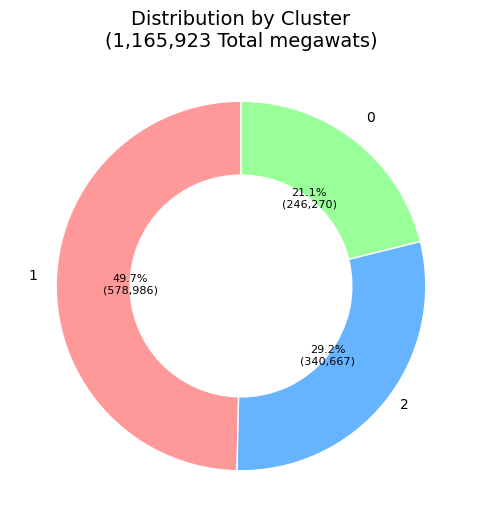

In [213]:


df_ByCluster = df_KMeans.groupby('Cluster')['Total_MW'].sum().sort_values(ascending=False)


custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create a figure with a subplot for the pie chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define a function to customize label display
def pie_label_func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    if pct >= 4.2:  # Display label only if the percentage is greater than or equal to 3%
        return f'{pct:.1f}%\n({absolute:,})'
    else:
        return ''

# Plot the pie chart with adjusted autopct label placement
wedges, texts, autotexts = ax.pie(
    df_ByCluster,
    labels=[f'{label}\n' if pct >= 3 else '' for label, pct in zip(df_ByCluster.index, df_ByCluster / df_ByCluster.sum() * 100)],
    autopct=lambda pct: pie_label_func(pct, df_ByCluster),
    startangle=90,
    colors=custom_colors,
    wedgeprops=dict(width=0.4),
    textprops=dict(color="black"),
    labeldistance=1.1,  # Adjust label distance from the center to avoid overlapping
)

# Customize the appearance of the wedges and text
for wedge, text, autotext in zip(wedges, texts, autotexts):
    wedge.set_edgecolor('white')  # White edges for better visibility
    text.set_fontsize(10)        # Adjust text font size
    autotext.set_fontsize(8)     # Adjust autopct text font size

# Add a title
plt.title(f'Distribution by Cluster\n({format(int(df_ByCluster.sum()), ",")} Total megawats)', fontsize=14)

# Save the pie chart as an image
# plt.savefig('DomPieChart_DistOPTRByDIV.png', bbox_inches='tight')

# Show the plot
plt.show()


In [241]:
df0 = df_KMeans[df_KMeans['Cluster']==0]
df1 = df_KMeans[df_KMeans['Cluster']==1]
df2 = df_KMeans[df_KMeans['Cluster']==2]

In [242]:
df1#.groupby('State')['Total_MW'].sum().sort_values(ascending=False)

,sector_nam,PrimSource,Install_MW,Total_MW,Install_MW_State,Total_MW_State,Sector_encoded,PimSource_encoded,SInstall_MW,STotal_MW,SSector_encoded,SPimSource_encoded,STotal_MW_State,Cluster,State
7,Electric Utility,coal,1021.8,951.1,18146.5,16742.1,2,2,2.994875,3.015438,-1.131274,-1.720915,-0.642068,1,Wisconsin
63,Electric Utility,natural gas,1208.8,1245.8,18146.5,16742.1,2,5,3.605747,4.056016,-1.131274,-0.791000,-0.642068,1,Wisconsin
64,Electric Utility,coal,1240.0,1112.0,18146.5,16742.1,2,2,3.707667,3.583572,-1.131274,-1.720915,-0.642068,1,Wisconsin
69,IPP Non-CHP,nuclear,1311.0,1211.0,18146.5,16742.1,4,6,3.939603,3.933138,0.577520,-0.481028,-0.642068,1,Wisconsin
92,Electric Utility,coal,1112.0,1148.1,18146.5,16742.1,2,2,3.289531,3.711040,-1.131274,-1.720915,-0.642068,1,Wisconsin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11771,IPP Non-CHP,natural gas,710.3,725.0,3441.0,3321.6,4,5,1.977301,2.217085,0.577520,-0.791000,-0.997462,1,Delaware
11817,IPP Non-CHP,petroleum,862.7,827.1,5139.6,4929.5,4,8,2.475145,2.577598,0.577520,0.138916,-0.954883,1,Maine
11969,Electric Utility,petroleum,1534.0,1461.2,6527.7,5981.0,2,8,4.668075,4.816588,-1.131274,0.138916,-0.927038,1,Puerto Rico
11970,Electric Utility,natural gas,1032.0,966.5,6527.7,5981.0,2,5,3.028196,3.069815,-1.131274,-0.791000,-0.927038,1,Puerto Rico


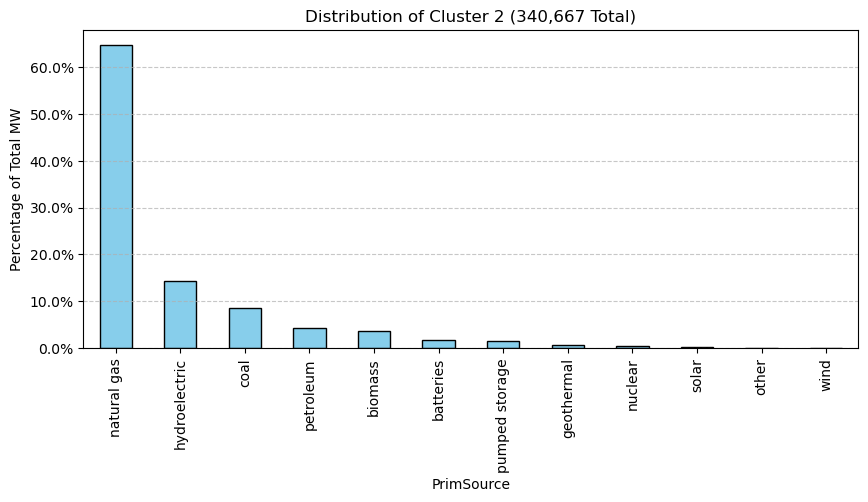

In [255]:
# Calculate percentage
df_StatisticsByCluster = df2.groupby('PrimSource')['Total_MW'].sum().sort_values(ascending=False)

df_StateStatistics_percent = df_StatisticsByCluster / df_StatisticsByCluster.sum() * 100
total_sum_per = df_StateStatistics_percent.sum()
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = df_StateStatistics_percent.plot(kind='bar', color='skyblue', edgecolor='black')

# Format y-axis labels to show percentage
ax.yaxis.set_major_formatter('{x:.1f}%')

# Add percentages to each bar
# for i, value in enumerate(df_StatisticsByCluster):
#     ax.text(i, value + 0.1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10, rotation=90)

plt.title(f'Distribution of Cluster 2 ({df_StatisticsByCluster.sum():,.0f} Total)')
plt.xlabel('PrimSource')
plt.ylabel('Percentage of Total MW')

# Rotate x-axis labels by 90 degrees
# plt.xticks(rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplots_adjust(bottom=0.35)
plt.savefig("DistCLuster2.png")

plt.show()

In [234]:


df1_ByState = df1.groupby('State')['Total_MW'].sum().sort_values(ascending=False)


custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create a figure with a subplot for the pie chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define a function to customize label display
def pie_label_func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    if pct >= 4.2:  # Display label only if the percentage is greater than or equal to 3%
        return f'{pct:.1f}%\n({absolute:,})'
    else:
        return ''

# Plot the pie chart with adjusted autopct label placement
wedges, texts, autotexts = ax.pie(
    df1_ByState,
    labels=[f'{label}\n' if pct >= 3 else '' for label, pct in zip(df1_ByState.index, df1_ByState / df1_ByState.sum() * 100)],
    autopct=lambda pct: pie_label_func(pct, df1_ByState),
    startangle=90,
    colors=custom_colors,
    wedgeprops=dict(width=0.4),
    textprops=dict(color="black"),
    labeldistance=1.1,  # Adjust label distance from the center to avoid overlapping
)

# Customize the appearance of the wedges and text
for wedge, text, autotext in zip(wedges, texts, autotexts):
    wedge.set_edgecolor('white')  # White edges for better visibility
    text.set_fontsize(10)        # Adjust text font size
    autotext.set_fontsize(8)     # Adjust autopct text font size

# Add a title
plt.title(f'Distribution of Cluster 0\n({format(int(df1_ByState.sum()), ",")} Total megawats)', fontsize=14)

# Save the pie chart as an image
# plt.savefig('DomPieChart_DistOPTRByDIV.png', bbox_inches='tight')

# Show the plot
plt.show()

KeyError: 'State'

In [ ]:
# Calculate percentage

df_StateStatistics_percent = df_StateStatistics / total_sum * 100
total_sum_per = df_StateStatistics_percent.sum()
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = df_StateStatistics_percent.plot(kind='bar', color='skyblue', edgecolor='black')

# Format y-axis labels to show percentage
ax.yaxis.set_major_formatter('{x:.1f}%')

# Add percentages to each bar
for i, value in enumerate(df_StateStatistics_percent):
    ax.text(i, value + 0.1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10, rotation=90)

plt.title(f'Percentage of QTY JBS by Label ({total_sum_per:,.0f} Total)')
plt.xlabel('StoreName')
plt.ylabel('Percentage of Total QTY')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()